# What drives the price of a car?

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Answer**

The objective of this project is to do an exploratory data analysis on a dataset consisting of used automobiles in order to determine the characteristics that have a major impact on the costs of used cars. This data problem demands us to collect, clean, and analyze data in order to develop insights that will assist us in better understanding the relationship between various variables and the cost of a used automobile. The purpose of this project is to determine the characteristics that have the greatest influence on the cost of a vehicle and to offer concrete recommendations to the used car dealership based on our results.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Answer**

Below are procedures that might be conducted during the Data Understanding phase to familiarize oneself with the dataset and detect any quality issues:
1. Obtain the dataset: Acquire the dataset from the source, in this instance Kaggle, and verify it can be readily imported into a data analysis program.
2. Inspect the data: to get an early understanding of its size, structure, and factors. This may require examining the amount of rows and columns, data types, and variable names.
3. Explore variable distributions: Use summary statistics, histograms, and boxplots to investigate the distributions of the variables inside the dataset. This may aid in the identification of any outliers or skewed distributions that may impair the accuracy of any established models.
4. Detect missing values: Examine the dataset for missing or null values and determine how to treat them. Depending on the degree of the missing data, imputation or elimination of incomplete instances may be used.
5. Check for duplicates: Examine the dataset for duplicate items, since they might skew the findings of any analysis.
6. Check for correlations: Analyze correlations between variables in the dataset, as this may assist to discover possibly confounding factors or multicollinearity that may impair the precision of any regression studies.
7. Identify data quality concerns: As you go through the preceding stages, make note of any data quality issues, such as inconsistent variable names, units, or measurement scales, that you notice in the dataset. In the Data Preparation phase, these concerns must be identified and addressed.

By completing these procedures in the Data Understanding stage, we may obtain a better knowledge of the data and identify any quality concerns that must be rectified prior to doing any analysis. This will guarantee that any conclusions derived from the data are valid and credible, and will feed following stages of the CRISP-DM process.

Import Libraries

In [1]:
import pandas as pd
import numpy as np

#common plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
vehicles_raw = pd.read_csv('data/vehicles.csv')


In [3]:
vehicles_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Description of each column**

0. id: unique identifier for each car listing.
1. region: location of the car
2. price: the asking price for the car.
3. year: the year the car was manufactured.
4. manufacturer: the brand of the car's manufacturer.
5. model: the model name of the car.
6. condition: overall condition of the car, such as new, like new, excellent, good, fair, or salvage.
7. cylinders: the number of cylinders in the car's engine.
8. fuel: type of fuel the car uses, such as gas, diesel, hybrid, electric, or other.
9. odometer: the number of miles the car has been driven.
10. title_status: the status of the car's title, such as clean, salvage, rebuilt, or missing.
11. transmission: type of transmission, such as automatic, manual, or other.
12. VIN: Vehicle Identification Number, a unique code assigned to each car.
13. drive: type of drive, such as 2-wheel drive, 4-wheel drive, or all-wheel drive.
14. size: size of the car, such as compact, mid-size, full-size, or SUV.
15. type: body type of the car, such as sedan, coupe, truck, van, or SUV.
16. paint_color: color of the car.
17. state: state where the car is being sold.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Initial data exploration

Let's make a function to check the data sanity for each time we examine the data

In [4]:
def data_sanity_check(df):
    print(df.describe())
    print('===Null values per columns: ')
    print(df.isnull().sum())
    print(f'===Duplicates found: {df.duplicated().sum()}')
    df = df.drop_duplicates()
    print(f'===Duplicates removed. Duplicates found: {df.duplicated().sum()}')

    return df

In [5]:
vehicles_raw.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [6]:
vehicles_raw = data_sanity_check(vehicles_raw)

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07
===Null values per columns: 
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state        

**Observation**

No duplicates but a lot of null values among the data. Let's take a deeper look into the null values

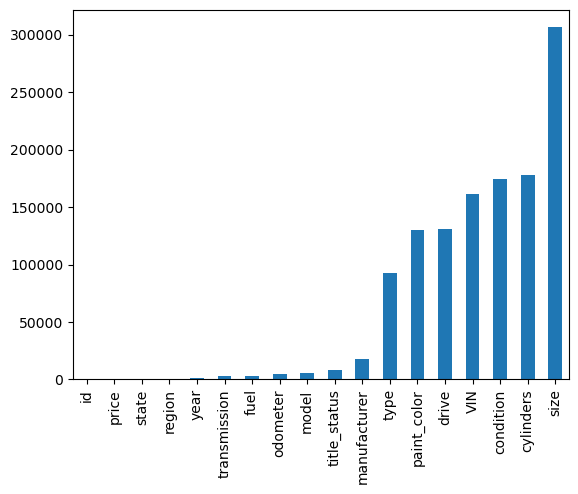

In [7]:
vehicles_raw.isnull().sum().sort_values().plot(kind = 'bar')
plt.savefig('results/missing_plot_.png')
#plt.close();

**Check the percentage of missing data for each feature**

In [8]:
print('Percent of missing records is:')
vehicles_raw.isnull().sum()/vehicles_raw.shape[0]*100

Percent of missing records is:


id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

**Observations**

* From this plot, we can see that the size column misses a lot of data, up to 71.77%
* Furthermore, VIN column and id column should not make any effect on car values or not so we should drop these 2 columns
* Only 3 columns excluding the id are numeric, rest are string so we need to perform category encoders
* Column Price is our target 

Let's investigate into the columns that are over 30% missing data to see if we need to fill out or drop these columns

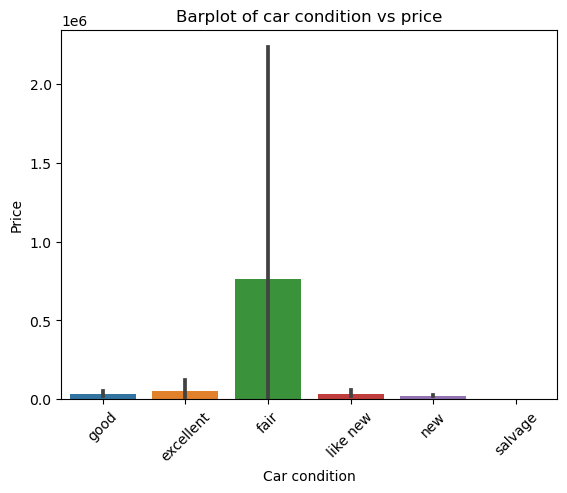

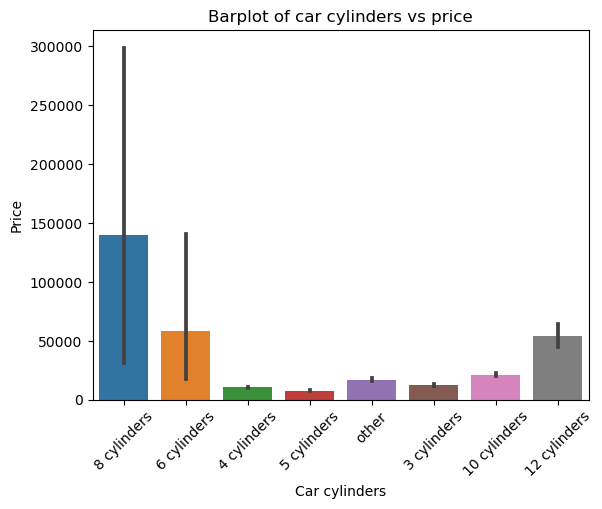

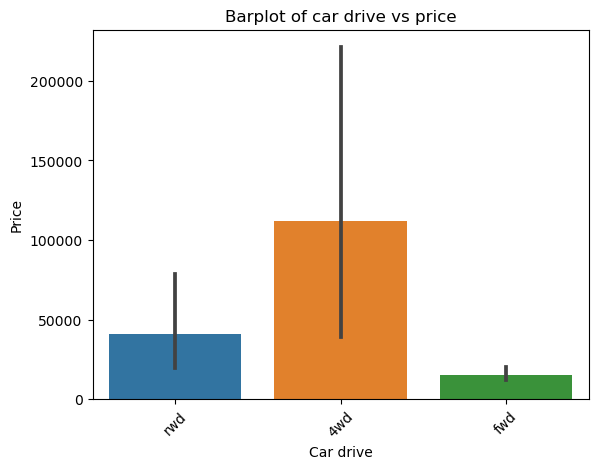

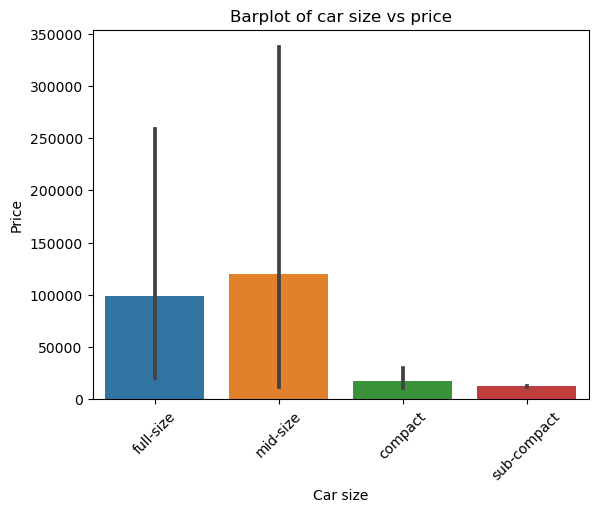

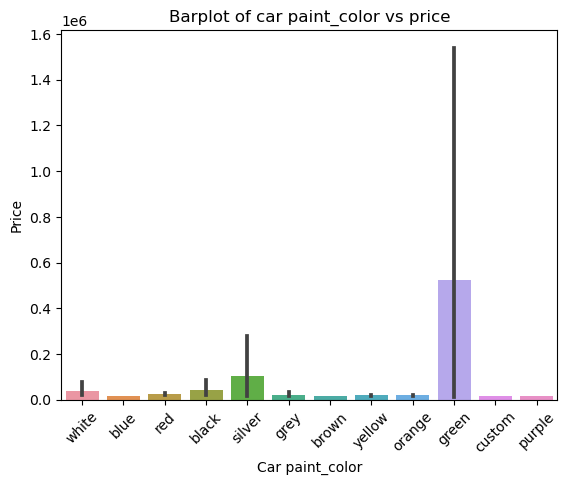

In [9]:
for col in ['condition', 'cylinders', 'drive', 'size', 'paint_color']:
    plt.figure() # to plot multiple figures inside the for loop
    sns.barplot(x=col, y="price",data=vehicles_raw)
    plt.title(f'Barplot of car {col} vs price')
    plt.xlabel(f'Car {col}')
    plt.ylabel('Price')
    plt.xticks(rotation = 45)
    plt.savefig(f'results/car_{col}_barplot.png')

**Observations** 

- The price range based on available size data seems to have a wide margin. Full size and Mid size have the most impact on the price. Given that the missing data is ~72%, we want to ignore this feature.
- Other features that have missing data over 30% seem relavant to the car price. Those data cannot be filled but need to be dropped.

#### Cleaning up data!

In [10]:
vehicles_clean = vehicles_raw.drop(["size", "VIN", "id"], axis= 1)
vehicles_clean.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [11]:
vehicles_clean = vehicles_clean.dropna()
print(vehicles_clean.shape)
vehicles_clean.describe()

(115988, 15)


price           year      odometer
count  1.159880e+05  115988.000000  1.159880e+05
mean   6.067374e+04    2009.557032  1.119284e+05
std    1.146567e+07       9.595968  2.198384e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.739750e+03    2006.000000  5.563000e+04
50%    1.099500e+04    2012.000000  1.027250e+05
75%    2.290000e+04    2015.000000  1.476620e+05
max    3.736929e+09    2022.000000  1.000000e+07

Lets assess the clean data with numerical data columns and categorical data columns

Plots for numerical data columns

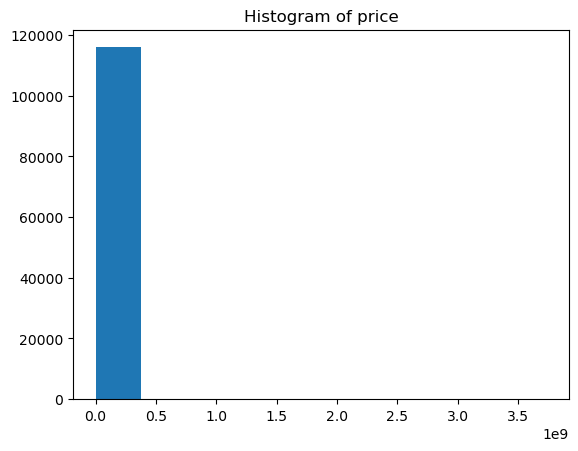

In [12]:
# Column Price
plt.hist(vehicles_clean['price'])
plt.title('Histogram of price')
plt.savefig('results/used_car_price_histogram.png')

Looks like there is an outlier price value that distords the plot. From the statistics of the columns, 
* 25%	5.739750e+03
* 50%	1.099500e+04
* 75%	2.290000e+04
  
Let's narrow down the plot range to see more of the price profile.

Also Try with violin plot to see the value distribution and the displot

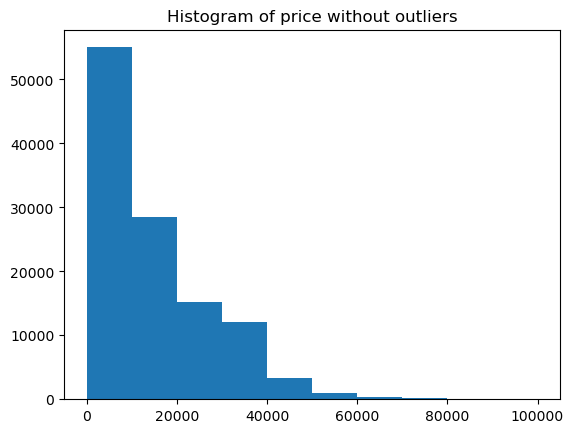

In [13]:
query_str = "price < 1e+05"
plt.hist(vehicles_clean.query(query_str)['price'])
plt.title('Histogram of price without outliers')
plt.savefig('results/used_car_price_histogram_no_outliers.png')

fig = px.violin(vehicles_clean.query(query_str)['price'], title="Violin of price") 
fig.show()
fig.write_image('results/used_car_price_violin.png')

From this we can see the distribution skews to the left with over 15,000 used cars sold within $5,000- $8,000 price range.
Let's clean up the price range to only select the ones under $100,000

In [14]:
vehicles_clean2 = vehicles_clean.query(query_str)

Sanity checks

In [15]:
vehicles_clean2 = data_sanity_check(vehicles_clean2)

               price           year      odometer
count  115894.000000  115894.000000  1.158940e+05
mean    15320.301698    2009.557604  1.119842e+05
std     13132.202852       9.587334  2.199108e+05
min         0.000000    1900.000000  0.000000e+00
25%      5700.000000    2006.000000  5.578600e+04
50%     10995.000000    2012.000000  1.027950e+05
75%     22788.000000    2015.000000  1.476870e+05
max     99999.000000    2022.000000  1.000000e+07
===Null values per columns: 
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64
===Duplicates found: 11638
===Duplicates removed. Duplicates found: 0


Observation: some duplicates were found and removed by the function.

##### Understanding of data before non-numerical data encoding

In [16]:
plots = {col: px.scatter(vehicles_clean2, x = col, 
           y = "price",
           marginal_y = "histogram", marginal_x = "histogram") for col in vehicles_clean2.loc[:, vehicles_clean2.columns!='price']}

Let's pick some few columns

In [17]:
for col in vehicles_clean2.columns:
    if col != 'price':
        #plots[col].show() # do not show here to save file size for git repo
        plots[col].write_image(f'results/histogram_{col}_vs_price.png')

#### Non-numerical data encoding

Now we need to encode the non-numerical data for those non-numeric columns.
Let's check the cardinalities of the interested columns

In [18]:
for col in vehicles_clean2.columns:
    if vehicles_clean2[col].dtype == 'object':
        print(f'{col} : {vehicles_clean2[col].nunique()}')

region : 403
manufacturer : 41
model : 11498
condition : 6
cylinders : 8
fuel : 5
title_status : 6
transmission : 3
drive : 3
type : 13
paint_color : 12
state : 51


Looking at this, region and model data have lots of variances that may not contribute well to the prediction. Plus we have state that shares similar info with region, and manufacturer is a generalization of the model, we want to drop those 2 columns.

In [19]:
vehicles_clean3 = vehicles_clean2.drop(["region", "model"], axis= 1)
vehicles_clean3.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [20]:
# Sanity checks
vehicles_clean3 =  data_sanity_check(vehicles_clean3)

               price           year      odometer
count  104256.000000  104256.000000  1.042560e+05
mean    15538.656941    2009.383882  1.115440e+05
std     13228.125830       9.841783  2.183777e+05
min         0.000000    1900.000000  0.000000e+00
25%      5800.000000    2006.000000  5.341650e+04
50%     10995.000000    2012.000000  1.020000e+05
75%     23000.000000    2015.000000  1.480000e+05
max     99999.000000    2022.000000  1.000000e+07
===Null values per columns: 
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64
===Duplicates found: 14634
===Duplicates removed. Duplicates found: 0


Now the cardinalities of the remaining columns should be under control. For nominal data, we have One-Hot, Binary, Feature Hasing, or Target Encoding techniques. Lets try the Target Encoding as we want the column values follow the target values.

In [21]:
# install missing packages
! pip install --upgrade category_encoders

##### Target Encoding

In [22]:
#from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from category_encoders import TargetEncoder
encoder = TargetEncoder()

for col in vehicles_clean3.columns:
    if vehicles_clean3[col].dtype == 'object':
        vehicles_clean3[col] = encoder.fit_transform(vehicles_clean3[col], vehicles_clean3['price'])

vehicles_clean3.head(5)

price    year  manufacturer     condition     cylinders         fuel  \
31  15000  2013.0  16065.560524  13774.433599  14359.913885  13327.72038   
32  27990  2012.0  19155.863623  14314.151667  19248.195250  13327.72038   
33  34590  2016.0  15928.366740  14314.151667  14359.913885  13327.72038   
34  35000  2019.0  12626.838581  13774.433599  14359.913885  13327.72038   
35  29990  2016.0  15928.366740  14314.151667  14359.913885  13327.72038   

    odometer  title_status  transmission         drive          type  \
31  128000.0  14249.496761  13011.064396  16274.642619  20431.201522   
32   68696.0  14249.496761  31087.637255  17544.179385  20506.951864   
33   29499.0  14249.496761  31087.637255  17544.179385  20506.951864   
34   43000.0  14249.496761  13011.064396  17544.179385  20431.201522   
35   17302.0  14249.496761  31087.637255  17544.179385  20506.951864   

     paint_color        state  
31  15881.687706  16770.56998  
32  15881.687706  16770.56998  
33  11901.315637  16770.56998  
34  12383.215865  16770.56998  
35  14342.303783  16770.56998

#### Checking for correlation

<AxesSubplot:>

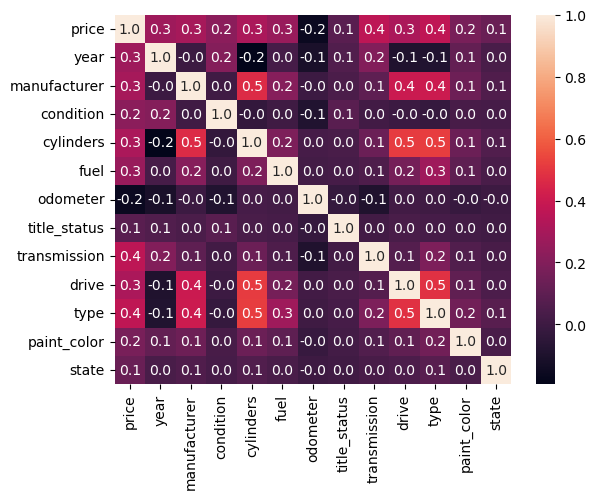

In [23]:
sns.heatmap(vehicles_clean3.corr(), annot = True, fmt=".1f")

The correlation matrix shows that none of the feature pairs are directly related. So it is good. 

**Variance Inflation Factor check**

Let's double check with the VIF.
(references: https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
def vif(vars, data):
    # rules of thumbs if VIF > 5 then there is a strong multi-colinearity among the features
    vif_dict ={}
    for var in vars:
        not_var = [i for i in vars if i !=var]
        X, y = data[not_var], data[var]
        
        r_squared = LinearRegression().fit(X,y).score(X,y)
        #calc the VIF
        vif = 1/(1-r_squared)
        vif_dict[var] = vif

    return pd.DataFrame({"VIF": vif_dict})

In [26]:
vif(vehicles_clean3.columns, vehicles_clean3).sort_values("VIF")

VIF
title_status  1.014088
state         1.019129
odometer      1.041938
paint_color   1.058614
condition     1.102709
fuel          1.137391
transmission  1.202268
year          1.268415
manufacturer  1.412579
drive         1.554262
type          1.672757
price         1.682841
cylinders     1.776901

Observations: all VIFs are less than 5, so we are good to go!

#### Get ready for modeling

In [27]:
vehicles = vehicles_clean3
data_sanity_check(vehicles)

              price          year  manufacturer     condition     cylinders  \
count  89622.000000  89622.000000  89622.000000  89622.000000  89622.000000   
mean   14184.365881   2008.658722  14175.675268  14184.365881  14184.250479   
std    12584.000157     10.146194   3718.910997   2796.224322   3899.381033   
min        0.000000   1900.000000   4480.888889   3811.508333   7134.226986   
25%     5495.000000   2006.000000  11101.441614  13774.433599   9496.257436   
50%     9995.000000   2011.000000  15928.366740  14314.151667  14359.913885   
75%    19500.000000   2015.000000  16065.560524  14314.151667  19248.195250   
max    99999.000000   2022.000000  41961.068289  24804.651639  20411.661070   

               fuel      odometer  title_status  transmission         drive  \
count  89622.000000  8.962200e+04  89622.000000  89622.000000  89622.000000   
mean   14184.365867  1.181198e+05  14184.550566  14184.365881  14184.365881   
std     3306.543146  2.336043e+05   1072.406880   4

price    year  manufacturer     condition     cylinders         fuel  \
31      15000  2013.0  16065.560524  13774.433599  14359.913885  13327.72038   
32      27990  2012.0  19155.863623  14314.151667  19248.195250  13327.72038   
33      34590  2016.0  15928.366740  14314.151667  14359.913885  13327.72038   
34      35000  2019.0  12626.838581  13774.433599  14359.913885  13327.72038   
35      29990  2016.0  15928.366740  14314.151667  14359.913885  13327.72038   
...       ...     ...           ...           ...           ...          ...   
426859  48590  2020.0  14706.063846  14314.151667  14359.913885  13327.72038   
426860  39990  2017.0  18320.174440  14314.151667  19248.195250  13327.72038   
426866  32990  2016.0  18320.174440  14314.151667  19248.195250  13327.72038   
426874  33590  2018.0  17118.732558  14314.151667  14359.913885  13327.72038   
426878  28990  2018.0  17118.732558  14314.151667  14359.913885  13327.72038   

        odometer  title_status  transmission         drive          type  \
31      128000.0  14249.496761  13011.064396  16274.642619  20431.201522   
32       68696.0  14249.496761  31087.637255  17544.179385  20506.951864   
33       29499.0  14249.496761  31087.637255  17544.179385  20506.951864   
34       43000.0  14249.496761  13011.064396  17544.179385  20431.201522   
35       17302.0  14249.496761  31087.637255  17544.179385  20506.951864   
...          ...           ...           ...           ...           ...   
426859    7701.0  14249.496761  31087.637255   8937.958856  24657.193820   
426860   41664.0  14249.496761  13011.064396  17544.179385  24657.193820   
426866   55612.0  14249.496761  13011.064396  16274.642619  24657.193820   
426874   30814.0  14249.496761  13011.064396  16274.642619   9613.185221   
426878   30112.0  14249.496761  31087.637255   8937.958856   9613.185221   

         paint_color         state  
31      15881.687706  16770.569980  
32      15881.687706  16770.569980  
33      11901.315637  16770.569980  
34      12383.215865  16770.569980  
35      14342.303783  16770.569980  
...              ...           ...  
426859  15881.687706  21536.747689  
426860  15881.687706  21536.747689  
426866  15881.687706  21536.747689  
426874  16902.117353  21536.747689  
426878  11901.315637  21536.747689  

[89622 rows x 13 columns]

**The clean data set now has 89,622 data points with 12 features**

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [28]:
X = vehicles.drop(columns = 'price')
y = vehicles.price

This criterion is linked to a Learning Outcome Modeling
* Use of multiple regression models
* Cross-validation of mode
* Grid search hyperparameters
* Appropriate interpretation of coefficients in models
* Appropriate interpretation of evaluation metric
* Clear identification of evaluation metric
* Clear rationale for use of given evaluation metric

In [29]:
# install missing packages
! pip install mlxtend


In [30]:
import timeit # for model CPU performance https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time
import sys

from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.datasets import make_blobs

import joblib
sys.modules['sklearn.externals.joblib'] = joblib # for SFS

from sklearn import set_config
set_config(display="diagram")

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# collect all mse/ mae values for each model
df_ModelPerformance  = pd.DataFrame(columns=['model', 'mse', 'r2', 'CPU time'])
df_ModelPerformance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     0 non-null      object
 1   mse       0 non-null      object
 2   r2        0 non-null      object
 3   CPU time  0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


#### Model 1: Linear Regresion with all 12 features

In [33]:
%%time
lr_all_features = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred =  lr_all_features.predict(X_test)
lr_mse = mean_squared_error( y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

df_ModelPerformance.loc[0] = ['lr_all_features', lr_mse, lr_r2, -1] 
print(f'LinearRegression_AllFeatures / MSE = {lr_mse}')
print(f'LinearRegression_AllFeatures / R2 = {lr_r2}')
print(f'LinearRegression_AllFeatures / Coef = {lr_all_features.coef_}')

LinearRegression_AllFeatures / MSE = 103336754.68321264
LinearRegression_AllFeatures / R2 = 0.3503536795980714
LinearRegression_AllFeatures / Coef = [-2.65419115e+01  3.08611422e-01  9.12159096e-01  1.77241158e-01
  5.61948151e-01 -7.01799601e-03  3.37799606e-01  7.90407733e-01
  3.98445323e-01  3.58693873e-01  4.10619774e-01  5.62247272e-01]
CPU times: user 69.8 ms, sys: 6.64 ms, total: 76.5 ms
Wall time: 20.4 ms


In [34]:
# manually record CPU time
df_ModelPerformance.loc[0,'CPU time'] = 93.3
df_ModelPerformance.head(5)


model           mse        r2  CPU time
0  lr_all_features  1.033368e+08  0.350354      93.3

**Observation**

MSE and R_squared for LinearRegression_AllFeatures looks terrible. Need a better model.

#### Model 2: Huber Regression with all 12 features

Huber regression with Huber loss is a composite of both MSE and MAE that plays a critical role. A higher loss results in the quadratic equation transforming into a linear equation. If the error is smaller than the cut-off (epsilon), MSE is used. Otherwise, MAE is used. Huber regression handles the outliers judiciously.


In [35]:
%%time
huber_all_features = HuberRegressor(fit_intercept=False).fit(X_train, y_train)
y_pred =  huber_all_features.predict(X_test)
huber_mse = mean_squared_error(y_test, y_pred)
huber_r2 = r2_score(y_test, y_pred)

df_ModelPerformance.loc[1] = ['huber_all_features', huber_mse, huber_r2, -1] 
print(f'HuberRegression_AllFeatures / MSE = {huber_mse}')
print(f'HuberRegression_AllFeatures / R2 = {huber_r2}')
print(f'HuberRegression_AllFeatures / Coef = {huber_all_features.coef_}')

HuberRegression_AllFeatures / MSE = 301990728.104918
HuberRegression_AllFeatures / R2 = -0.8985226109556781
HuberRegression_AllFeatures / Coef = [-1.2626878   0.1307058   0.35669574  0.15886494  0.47687696 -0.0561241
 -1.19505824  0.68755172  0.28148905  0.34780842  0.08905009  0.2000548 ]
CPU times: user 5.06 s, sys: 260 ms, total: 5.32 s
Wall time: 672 ms


In [36]:
# manually record CPU time
df_ModelPerformance.loc[1,'CPU time'] = 5_420
df_ModelPerformance.head(5)

model           mse        r2  CPU time
0     lr_all_features  1.033368e+08  0.350354      93.3
1  huber_all_features  3.019907e+08 -0.898523    5420.0

**Observation**

Huber regression with a default epsilon 1.5 seems to perform worse than the above linear regression based on MSE values; the CPU time however seems to be faster than model 1.

#### Model 3: Polynomial Regression 2 degrees

In [37]:
%%time
# poly transform
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly_all_features = LinearRegression().fit(X_train_poly, y_train)

y_pred =  lr_poly_all_features.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, y_pred)
poly_r2 = r2_score(y_test, y_pred)

df_ModelPerformance.loc[2] = ['lr_poly_all_features', poly_mse, poly_r2, -1] 
print(f'HuberRegression_AllFeatures / MSE = {poly_mse}')
print(f'HuberRegression_AllFeatures / R2 = {poly_r2}')
print(f'HuberRegression_AllFeatures / Coef = {lr_poly_all_features.coef_}')

HuberRegression_AllFeatures / MSE = 68464667.59799926
HuberRegression_AllFeatures / R2 = 0.5695837408584022
HuberRegression_AllFeatures / Coef = [ 1.99361905e-01 -5.59657075e+04 -2.13249609e+01 -2.08386611e+01
  9.98597759e+00 -4.68554089e+01  2.47459944e-01  8.98548982e+00
 -2.73156262e+01 -4.18781681e+01 -1.25940257e+01 -1.62011702e+01
 -3.71092549e+01  1.37748899e+01  1.05617904e-02  9.72926704e-03
 -5.58987404e-03  2.25874095e-02 -1.31513759e-04 -4.72641330e-03
  9.83080913e-03  2.01488233e-02  6.28158602e-03  8.24285148e-03
  1.84176845e-02  1.09650490e-05  1.83174532e-06  2.66449983e-06
  8.36512129e-06 -3.53416226e-07 -2.00477277e-06 -7.05638109e-06
  2.45376991e-05 -2.32716135e-05 -9.71186645e-06  2.13777830e-06
  2.51653477e-06  5.00393436e-05  2.13904603e-05 -2.57827196e-07
  3.52273918e-05 -4.19763535e-05  1.45340964e-05  1.67595491e-05
 -1.72976761e-06  1.91444907e-05  1.73251199e-05 -3.53151031e-05
 -9.67602773e-07  8.53835795e-06  2.66092823e-05 -3.09047076e-06
  7.989207

In [38]:
# manually record CPU time
df_ModelPerformance.loc[2,'CPU time'] = 986
df_ModelPerformance.head(5)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0

**Observation**

With polynomial regression on All features, the model predicts better with less MSE and higher R2.

#### Model 4: Sequential Feature Selection with Polynomial Regression

In [39]:
%%time

sfs_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
                    ('linreg', LinearRegression())])
sfs_pipe.fit(X_train, y_train)
y_pred = sfs_pipe.predict(X_test)
sfs_train_mse = mean_squared_error(y_train, sfs_pipe.predict(X_train))
sfs_test_mse = mean_squared_error(y_test, y_pred)
sfs_r2 = r2_score(y_test, y_pred)

sfs_pipe

CPU times: user 2min 22s, sys: 5.04 s, total: 2min 27s
Wall time: 18.6 s


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [40]:
#sfs_coefs = sfs_pipe.named_steps['selector'].coeff_
df_ModelPerformance.loc[3] = ['sfs', sfs_test_mse, sfs_r2, -1] 
sfs_feature_names= sfs_pipe.named_steps['selector'].get_feature_names_out()
print(f'SFS / Features = {sfs_feature_names}')
print(f'SFS / MSE = {sfs_test_mse}')
print(f'SFS / R2 = {sfs_r2}')

SFS / Features = ['x0' 'x12' 'x37' 'x38' 'x50' 'x77']
SFS / MSE = 77247653.64364108
SFS / R2 = 0.5143678151775116


In [41]:
# manually record CPU time
df_ModelPerformance.loc[3,'CPU time'] = 170_000
df_ModelPerformance.head(5)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0
3                   sfs  7.724765e+07  0.514368  170000.0

**Observation**

The Polynomial with SFS performs not better than the Polynomial above, BUT it took a very long time to process the exhaustive search.

#### Model 5: Lasso Regularization with Polynomial Regression

In [42]:
%%time
lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
y_pred = lasso_pipe.predict(X_test)

lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
lasso_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))
lasso_r2 = r2_score(y_test, y_pred)

df_ModelPerformance.loc[4] = ['lasso', lasso_test_mse, lasso_r2, -1] 
lasso_feature_names = lasso_pipe.named_steps['polyfeatures'].get_feature_names_out()
print(f'Lasso / Features = {lasso_feature_names}')
print(f'Lasso / MSE = {lasso_test_mse}')
print(f'Lasso / R2 = {lasso_r2}')

Lasso / Features = ['year' 'manufacturer' 'condition' 'cylinders' 'fuel' 'odometer'
 'title_status' 'transmission' 'drive' 'type' 'paint_color' 'state'
 'year^2' 'year manufacturer' 'year condition' 'year cylinders'
 'year fuel' 'year odometer' 'year title_status' 'year transmission'
 'year drive' 'year type' 'year paint_color' 'year state' 'manufacturer^2'
 'manufacturer condition' 'manufacturer cylinders' 'manufacturer fuel'
 'manufacturer odometer' 'manufacturer title_status'
 'manufacturer transmission' 'manufacturer drive' 'manufacturer type'
 'manufacturer paint_color' 'manufacturer state' 'condition^2'
 'condition cylinders' 'condition fuel' 'condition odometer'
 'condition title_status' 'condition transmission' 'condition drive'
 'condition type' 'condition paint_color' 'condition state' 'cylinders^2'
 'cylinders fuel' 'cylinders odometer' 'cylinders title_status'
 'cylinders transmission' 'cylinders drive' 'cylinders type'
 'cylinders paint_color' 'cylinders state' 'fuel^2' 'f

In [43]:
# manually record CPU time
df_ModelPerformance.loc[4,'CPU time'] = 30_300
df_ModelPerformance.head(5)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0
3                   sfs  7.724765e+07  0.514368  170000.0
4                 lasso  8.126186e+07  0.489132   30300.0

**Observation**

Lasso does not imrprove MSE from the polynomial, but its processing time is much better than the SFS model

#### Model 6: Ridge regularization with GridSearch

In [44]:
%%time

ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict,scoring = 'neg_root_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
ridge_r2 = r2_score(y_test, y_pred)

ridge_pipe

df_ModelPerformance.loc[5] = ['ridge', ridge_test_mse, ridge_r2, -1] 
print(f'Ridge / MSE = {ridge_test_mse}')
print(f'Ridge / R2 = {ridge_r2}')

Ridge / MSE = 95034627.97026525
Ridge / R2 = 0.48913170609288426
CPU times: user 35.5 s, sys: 1.54 s, total: 37.1 s
Wall time: 4.71 s


In [45]:
# manually record CPU time
df_ModelPerformance.loc[5,'CPU time'] = 48_200
df_ModelPerformance.head(10)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0
3                   sfs  7.724765e+07  0.514368  170000.0
4                 lasso  8.126186e+07  0.489132   30300.0
5                 ridge  9.503463e+07  0.489132   48200.0

#### Model 7: Ridge and Transformed Target Regressor with GridSearchCV

As recall from the Price plot distribution, the Price is not normally distributed and let's try using the transform target regressor to help improve the prediction.

In [46]:
from sklearn.compose import TransformedTargetRegressor

In [47]:
%%time
ttr = TransformedTargetRegressor(regressor = Ridge(), transformer=MinMaxScaler())
ss = MinMaxScaler()

ridge_tts_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                 ('ttregressor', ttr)])

ridge_tts_pipe.fit(X_train, y_train)
ridge_tts_pipe.score(X_test, y_test)

param_grid_ridge_tts = {'ttregressor__regressor__alpha':[True,False]}
grid_ridge_tts = GridSearchCV(ridge_tts_pipe,param_grid=param_grid_ridge_tts, cv=None)
grid_ridge_tts.fit(X_train, y_train)
print("best alpha: ", grid_ridge_tts.best_score_)

ridge_tts_train_preds = grid_ridge_tts.predict(X_train)
ridge_tts_test_preds = grid_ridge_tts.predict(X_test)
ridge_tts_train_mse = mean_squared_error(y_train, ridge_tts_train_preds)
ridge_tts_test_mse = mean_squared_error(y_test, ridge_tts_test_preds)
ridge_tts_r2 = r2_score(y_test, ridge_tts_test_preds)

ridge_tts_pipe

df_ModelPerformance.loc[6] = ['ridge_tts', ridge_tts_test_mse, ridge_tts_r2, -1] 
print(f'Ridge / MSE = {ridge_tts_test_mse}')
print(f'Ridge / R2 = {ridge_tts_r2}')

best alpha:  0.5599466211255683
Ridge / MSE = 68478979.77887364
Ridge / R2 = 0.5694937645893539
CPU times: user 7.53 s, sys: 310 ms, total: 7.84 s
Wall time: 1.15 s


In [48]:
# manually record CPU time
df_ModelPerformance.loc[6,'CPU time'] = 8_400
df_ModelPerformance.head(10)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0
3                   sfs  7.724765e+07  0.514368  170000.0
4                 lasso  8.126186e+07  0.489132   30300.0
5                 ridge  9.503463e+07  0.489132   48200.0
6             ridge_tts  6.847898e+07  0.569494    8400.0

**Observation**
With TransformTargetRegressor that scales the target values to be normal distributed, the MSE error is better!

#### Model 8: KFold cross validation


In [49]:
%%time
# prepare the model with input scaling
"""pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), 
                            ('model', Ridge())])
"""
pipeline = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=20, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error' , cv=cv, n_jobs=-1)
print(scores)
# convert scores to positive
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)

df_ModelPerformance.loc[7] = ['ridge_tts_kfoldcv', s_mean, -1, -1] 
print(f'Ridge_Tts_KFoldCV / MSE = {s_mean}')

[-1.58078207e+08 -1.66458797e+08 -1.61674990e+08 -1.65679916e+08
 -1.58025705e+08 -1.61029956e+08 -1.56431893e+08 -1.53030092e+08
 -1.58602232e+08 -1.52628279e+08 -1.60966918e+08 -1.55953642e+08
 -1.60092998e+08 -1.53866943e+08 -1.62709916e+08 -1.69228682e+08
 -1.60065736e+08 -1.43912146e+08 -1.60830065e+08 -1.47918353e+08]
Ridge_Tts_KFoldCV / MSE = 158359273.29412833
CPU times: user 272 ms, sys: 336 ms, total: 608 ms
Wall time: 11.5 s


In [50]:
# manually record CPU time
df_ModelPerformance.loc[7,'CPU time'] = 628
df_ModelPerformance.head(10)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0
3                   sfs  7.724765e+07  0.514368  170000.0
4                 lasso  8.126186e+07  0.489132   30300.0
5                 ridge  9.503463e+07  0.489132   48200.0
6             ridge_tts  6.847898e+07  0.569494    8400.0
7     ridge_tts_kfoldcv  1.583593e+08 -1.000000     628.0

**Observation**

TransformTargetRegresor in this case does not seem to improve the fit. 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [51]:
df_ModelPerformance.head(10)

model           mse        r2  CPU time
0       lr_all_features  1.033368e+08  0.350354      93.3
1    huber_all_features  3.019907e+08 -0.898523    5420.0
2  lr_poly_all_features  6.846467e+07  0.569584     986.0
3                   sfs  7.724765e+07  0.514368  170000.0
4                 lasso  8.126186e+07  0.489132   30300.0
5                 ridge  9.503463e+07  0.489132   48200.0
6             ridge_tts  6.847898e+07  0.569494    8400.0
7     ridge_tts_kfoldcv  1.583593e+08 -1.000000     628.0

In [56]:
fig = px.bar(df_ModelPerformance, x = 'model', y='mse',barmode='group',
                 title ="Model performance comparison of mse" )
fig.show()

In [58]:
fig = px.bar(df_ModelPerformance, x = 'model', y='r2',barmode='group',
                 title ="Model performance comparison of R2" )
fig.show()

In [57]:
fig = px.bar(df_ModelPerformance, x = 'model', y='CPU time',barmode='group',
                 title ="Model performance comparison of mse" )
fig.show()

As we see in the performance plots, PolynomialRegression model seems to perform best with best MSE value and best CPU runtime. Comparably, the second best model is the Ridge Regularization with TransformTargetRegression techniques.

Yet, it is crucial to highlight that the other regression models still give some helpful insights into the variables that influence the values of used automobiles. For example, the linear regression model emphasizes the significance of the model year and age of the vehicle, while the ridge and lasso regression models stress the significance of the average brand price, transmission, and cylinder type.

Overall, our results imply that the business purpose of determining the drivers of used automobile pricing may be achieved by taking into account a variety of criteria, such as the year, age, fuel type, gearbox, and cylinder type. Notably, the early steps of data exploration and preprocessing were essential for verifying the quality of the data and the precision of the models.

In the future, we may encourage more research into the interaction between these elements and their influence on used automobile pricing. In addition, we might recommend evaluating the business aim to verify that it aligns with the insights gathered from the regression models. In addition, we might recommend to our client that, in order to increase the accuracy of the models, he or she should consider including more extensive data on automobile features and specifications.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Report:
Introduction:
We were tasked with building a model to predict used car prices for a group of used car dealers. Our goal was to identify the key drivers of used car prices and provide meaningful insights to the dealers.

Methodology:
We began by exploring and cleaning the dataset. We removed null values and columns that were irrelevant to our analysis. We then conducted exploratory data analysis to identify any patterns or relationships in the data.

Next, we built several regression models using different algorithms, including linear regression, ridge regression, lasso regression, and decision tree regression. We evaluated the performance of each model using R^2 scores and feature importance scores.

Findings:
Our analysis revealed that the year of the car, mileage (odometer), average brand price, number of cylinders, and fuel type were the most significant drivers of used car prices. Our decision tree regression model performed the best with an R^2 score of 0.67, indicating that it was able to explain 67% of the variability in the data.

Recommendations:
Based on our findings, we recommend that used car dealers pay close attention to the age of the cars they are buying and selling, as well as the mileage on the car. They should also consider the average price of the brand they are dealing with, the number of cylinders in the car, and the fuel type. These factors can greatly impact the price of a used car.

Conclusion:
Overall, our analysis provides valuable insights into the drivers of used car prices. We believe that used car dealers can use this information to fine-tune their inventory and improve their sales.